In [1]:
import numpy as np
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')
from tqdm.auto import tqdm
from IPython.display import display, Math
from numpyarray_to_latex.jupyter import to_ltx
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-muted', 'practicals.mplstyle'])
def pprint(*args):
    res = ""
    for i in args:
        if type(i) == np.ndarray:
            res += to_ltx(i, brackets='[]')
        elif type(i) == str:
            res += i
    display(Math(res))

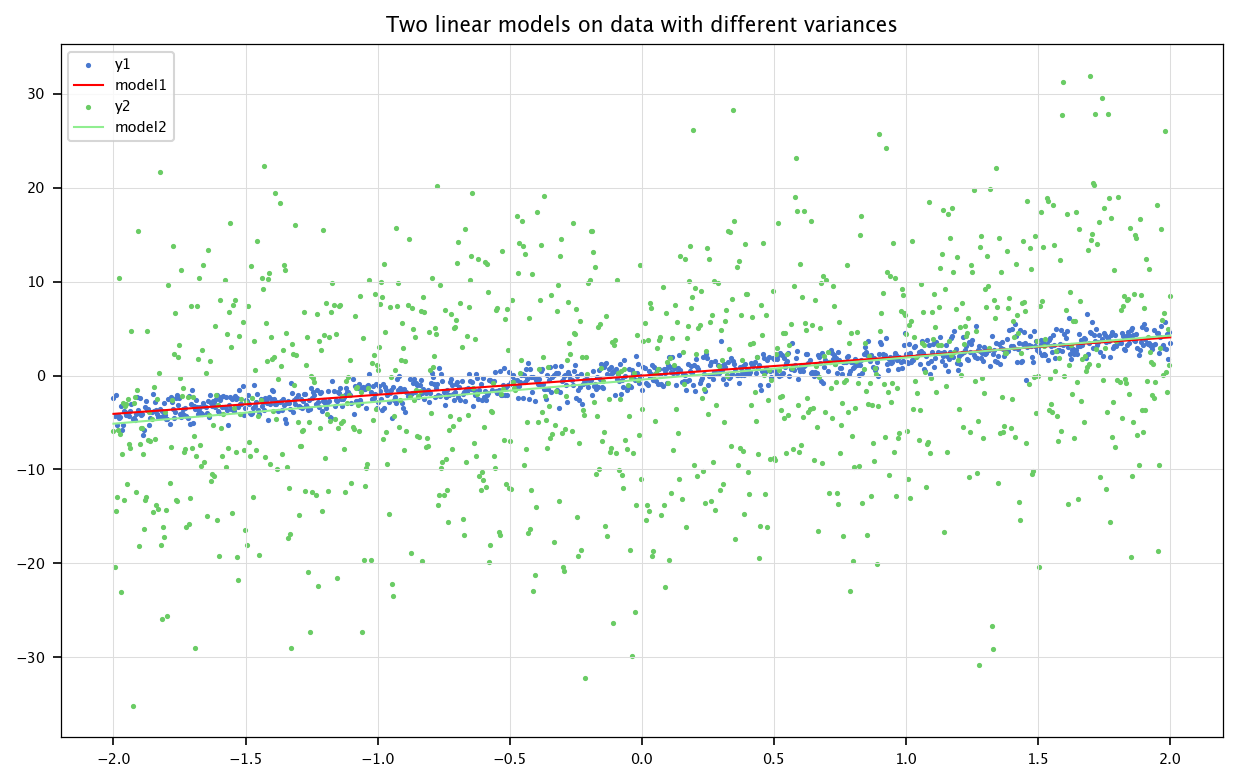

In [2]:
from sklearn.linear_model import LinearRegression
x = np.linspace(-2, 2, 1000).reshape(1000,-1)
B1, B2 = np.random.normal(0, 1, size=(1000,1)), np.random.normal(0, 10, size=(1000,1))
A = 2
y1 = A*x+B1
y2 = A*x+B2

model1 = LinearRegression().fit(x, y1)
model2 = LinearRegression().fit(x, y2)

plt.figure(figsize=(10, 6))
plt.scatter(x, y1, marker='.', label='y1')
plt.plot(x, model1.predict(x), color='red', label='model1')
plt.scatter(x, y2, marker='.', label='y2')
plt.plot(x, model2.predict(x), color='lightgreen', label='model2')
plt.title("Two linear models on data with different variances")
plt.legend()
plt.grid("on")
plt.show()

In [3]:
def mse(y, y_hat):
    return np.mean((y-y_hat)**2)

def nmse(y, y_hat):
    return np.mean((y-y_hat)**2)/np.std(y)**2

In [4]:
print(f"MSEs: {mse(y1, model1.predict(x))}, {mse(y2, model2.predict(x))}")
print(f"NMSEs: {nmse(y1, model1.predict(x))}, {nmse(y2, model2.predict(x))}")

MSEs: 0.9260703111237398, 102.64963058299332
NMSEs: 0.14306216122029342, 0.9331037608364451


In [5]:
def compute(data):
    data['y'] = np.zeros(data.shape[0])
    for i in range(6):
        if i%3 == 0:
            data['y'] += np.random.uniform(-1, 1) * data[f'x_useful_{i+1}'] + np.random.uniform(-5, 5)
        elif i%3 == 1:
            data['y'] += np.random.uniform(-1, 1) * data[f'x_useful_{i+1}']**2 + np.random.uniform(-5, 5)
        elif i%3 == 2:
            data['y'] += np.random.uniform(-1, 1) * np.sin(data[f'x_useful_{i+1}']) + np.random.uniform(-5, 5)
    return data

In [6]:
n_x_useful = 6
n_x_useless = 24
n_samples = 1000
d = {}
np.random.seed(0)

for i in range(n_x_useful):
    m, s = np.random.uniform(-1, 1), np.random.uniform(0.5, 2.5)
    d[f'x_useful_{i+1}'] = np.random.normal(m, s, size=(n_samples,))
for i in range(n_x_useless):
    m, s = np.random.uniform(-1, 1), np.random.uniform(0.5, 2.5)
    d[f'x_useless_{i+1}'] = np.random.normal(m, s, size=(n_samples,))

data = pd.DataFrame(d)

data = compute(data)

In [7]:
data.describe(include='all')

,x_useful_1,x_useful_2,x_useful_3,x_useful_4,x_useful_5,x_useful_6,x_useless_1,x_useless_2,x_useless_3,x_useless_4,...,x_useless_16,x_useless_17,x_useless_18,x_useless_19,x_useless_20,x_useless_21,x_useless_22,x_useless_23,x_useless_24,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.008883,0.787868,-0.862362,-0.220739,0.900991,0.048531,0.848947,0.019645,0.655122,-0.189598,...,-0.421467,0.821257,-0.011411,0.441756,-0.958489,-0.384471,-0.152625,-0.518022,0.051116,-7.379040
std,1.904117,2.362233,1.466222,0.881817,1.535395,0.512844,1.362313,1.729953,1.665836,0.771923,...,0.922338,0.862039,2.287231,1.402679,1.452495,0.787796,0.610938,2.501076,1.985946,1.890504
min,-5.782583,-6.520188,-5.587836,-3.444757,-3.751236,-1.380297,-3.305645,-5.469208,-4.426479,-2.355184,...,-3.443265,-1.763982,-7.985982,-4.070035,-5.422766,-2.947481,-1.917751,-11.958636,-6.453296,-13.989287
25%,-1.250588,-0.839990,-1.910921,-0.821390,-0.111143,-0.293415,-0.091018,-1.090598,-0.432532,-0.738497,...,-1.025653,0.250196,-1.464619,-0.527079,-1.967275,-0.890462,-0.564771,-2.155428,-1.329528,-8.514752
50%,-0.014389,0.822298,-0.868373,-0.229933,0.883910,0.050555,0.825699,0.014043,0.655699,-0.199494,...,-0.423784,0.844540,0.021261,0.423711,-1.010335,-0.403122,-0.147460,-0.412912,0.054168,-7.414389
75%,1.269272,2.284124,0.175776,0.372973,1.957939,0.386908,1.786537,1.128925,1.744190,0.350852,...,0.211144,1.361641,1.522601,1.368873,0.002406,0.173736,0.252462,1.202683,1.373122,-6.287151
max,5.424227,8.481613,3.712036,3.085683,5.435128,1.539755,4.825280,5.912388,5.919659,2.026439,...,3.010346,4.035696,7.689106,5.682900,3.504355,2.146540,1.745356,8.160750,5.685927,2.202998


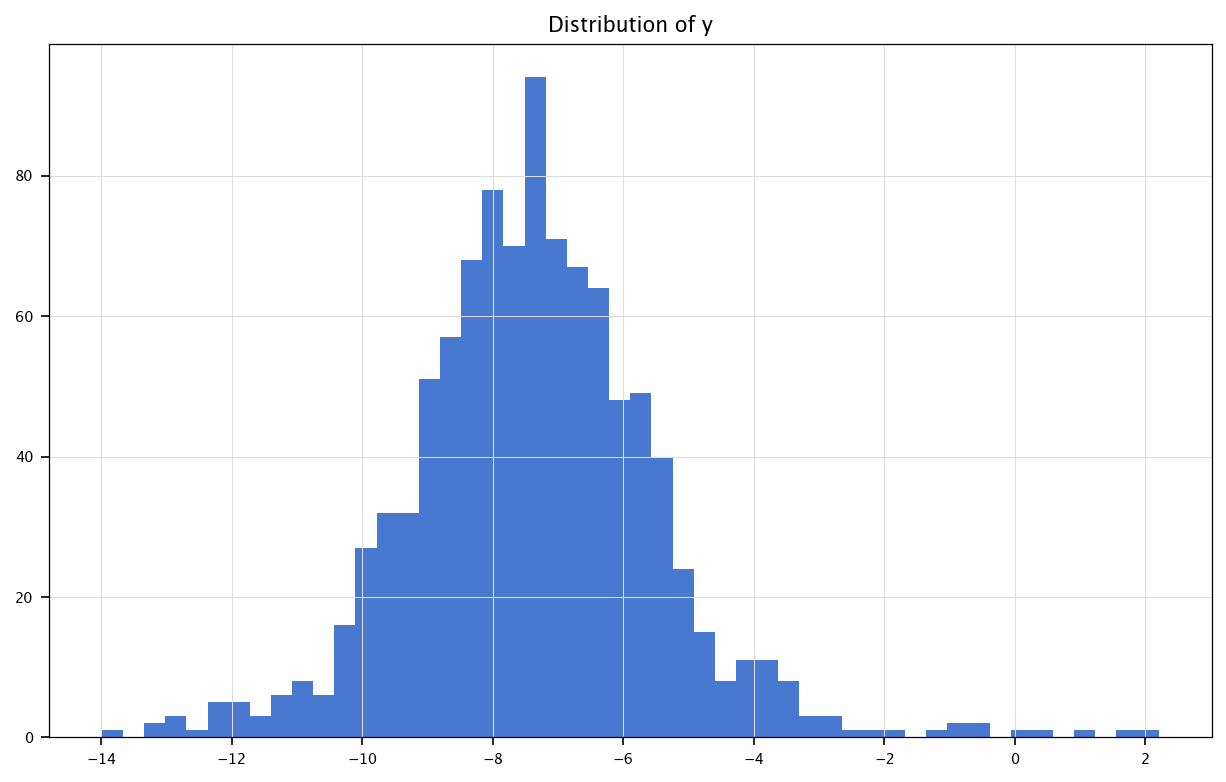

Mean of Y: -7.379040070934719
Variance of Y: 3.5704323990926374


In [8]:
Y = data['y'].values
X = data.drop(columns=['y'])

N = X.shape[0]
n = X.shape[1]

plt.figure(figsize=(10, 6))
plt.hist(Y, bins=50)
plt.title("Distribution of y")
plt.grid("on")
plt.show()

print("Mean of Y:", np.mean(Y))
print("Variance of Y:", np.var(Y))

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)
Y_hat = model.predict(X)

empirical_error = nmse(Y, Y_hat)
print(f"Empirical error: {empirical_error:.5f}")

Empirical error: 0.55375


In [10]:
coefs = pd.Series(model.coef_, index=X.columns)
coefs

x_useful_1     -0.201436
x_useful_2      0.245148
x_useful_3     -0.136977
x_useful_4      0.899940
x_useful_5     -0.392151
x_useful_6     -0.152609
x_useless_1     0.066708
x_useless_2     0.017732
x_useless_3     0.002349
x_useless_4    -0.035563
x_useless_5    -0.051568
x_useless_6     0.016830
x_useless_7    -0.028055
x_useless_8     0.021751
x_useless_9     0.031762
x_useless_10   -0.014019
x_useless_11   -0.002496
x_useless_12    0.066974
x_useless_13   -0.002970
x_useless_14    0.027713
x_useless_15   -0.003320
x_useless_16    0.004007
x_useless_17   -0.033228
x_useless_18    0.032634
x_useless_19   -0.011024
x_useless_20    0.015800
x_useless_21    0.044646
x_useless_22   -0.107929
x_useless_23    0.005993
x_useless_24    0.003837
dtype: float64

In [11]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=3)
CV_err_lm_single_model = []

for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    model = LinearRegression()
    model.fit(X_tr, Y_tr)
    Y_hat_ts = model.predict(X_ts)
    CV_err_lm_single_model.append(nmse(Y_ts, Y_hat_ts))

print(f"CV error: {np.mean(CV_err_lm_single_model):.5f}, std dev: {np.std(CV_err_lm_single_model):.5f}")

CV error: 0.61060, std dev: 0.08403


In [12]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=3)
model.fit(X, Y)
Y_hat = model.predict(X)

empirical_error = nmse(Y, Y_hat)
print(f"Empirical error: {empirical_error:.5f}")

Empirical error: 0.00000


In [13]:
model.get_depth(), model.get_n_leaves()

(22, 1000)

In [14]:
CV_err_rpart_single_model = []

for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    model = DecisionTreeRegressor(random_state=3)
    model.fit(X_tr, Y_tr)
    Y_hat_ts = model.predict(X_ts)
    CV_err_rpart_single_model.append(nmse(Y_ts, Y_hat_ts))

print(f"CV error: {np.mean(CV_err_rpart_single_model):.5f}, std dev: {np.std(CV_err_rpart_single_model):.5f}")

CV error: 0.33924, std dev: 0.08885


  0%|          | 0/50 [00:00<?, ?it/s]

Best lambda: 0.2822222222222222
Greatests coefficients indexes: [ 0  4 27 23]
Greatests coefficients: [-7.1367055   0.89720319 -0.34672033 -0.33732339]


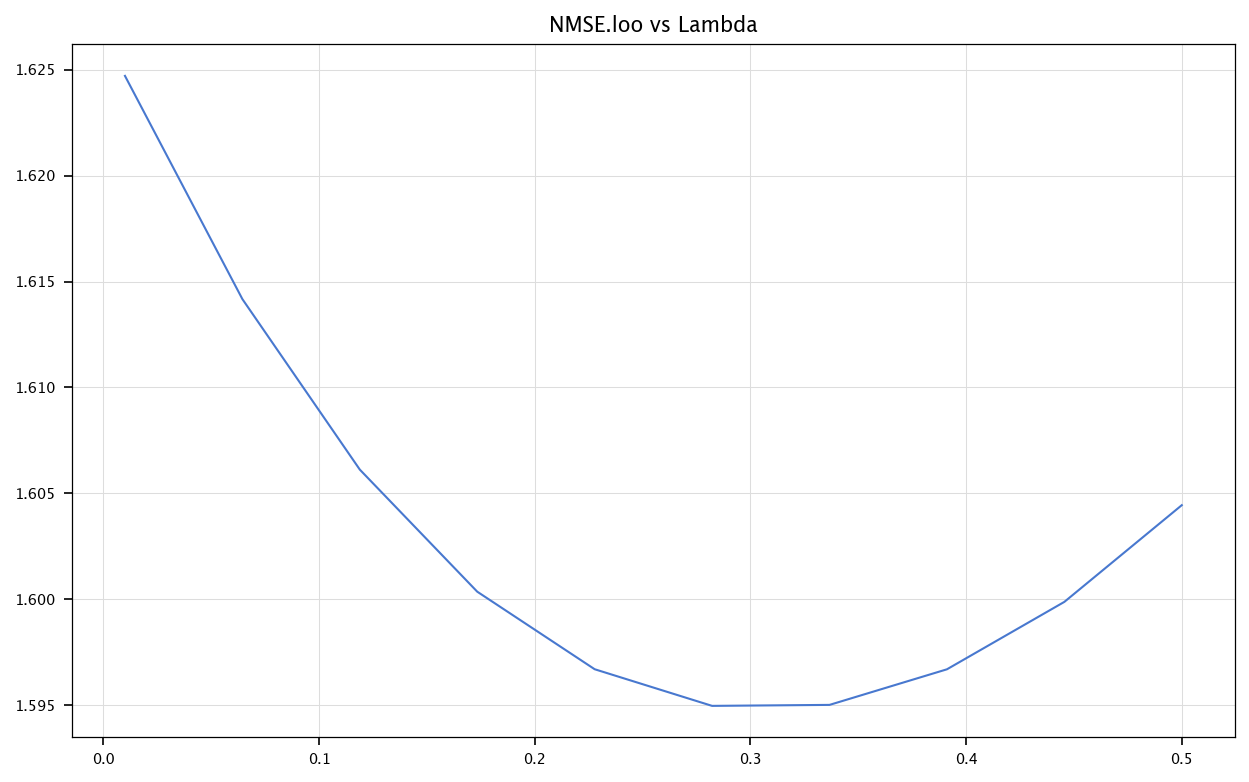

In [15]:
X_np = X.to_numpy()[:50]

N = X_np.shape[0]
lambdas = np.linspace(0.01, 0.5, 10)
E = np.empty((N, len(lambdas)))  
E[:] = np.nan

for i in tqdm(range(N)):
    Xtr = np.column_stack((np.ones(N - 1), np.delete(X_np, i, axis=0)))
    Ytr = np.delete(Y[:50], i)
    
    Xts = np.concatenate(([1], X_np[i,]))
    
    cnt = 0
    for l in lambdas:
        A = Xtr.T @ Xtr + l * np.eye(n + 1)
        b = Xtr.T @ Ytr
        betahat = np.linalg.inv(A) @ b
        Yhati = Xts @ betahat
        E[i, cnt] = ((Y[i] - Yhati) ** 2)
        cnt += 1

mseloo = np.mean(E, axis=0)/np.std(Y)**2

bestLambda = lambdas[np.argmin(np.mean(E, axis=0))]
print(f"Best lambda: {bestLambda}")

XX = np.column_stack((np.ones(N), X_np))
A_final = np.dot(XX.T, XX) + bestLambda * np.eye(n + 1)
b_final = np.dot(XX.T, Y[:50])
betahat = np.linalg.inv(A_final) @ XX.T @ Y[:50]

abs_betahat = np.abs(betahat)
sorted_indices = np.argsort(-abs_betahat)
top4 = sorted_indices[:4] 
print(f"Greatests coefficients indexes: {top4}")
print(f"Greatests coefficients: {betahat[top4]}")
plt.figure(figsize=(10, 6))
plt.plot(lambdas, mseloo)
plt.title('NMSE.loo vs Lambda')
plt.grid("on")
plt.show()

In [16]:
from tqdm.auto import tqdm

  0%|          | 0/15 [00:00<?, ?it/s]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

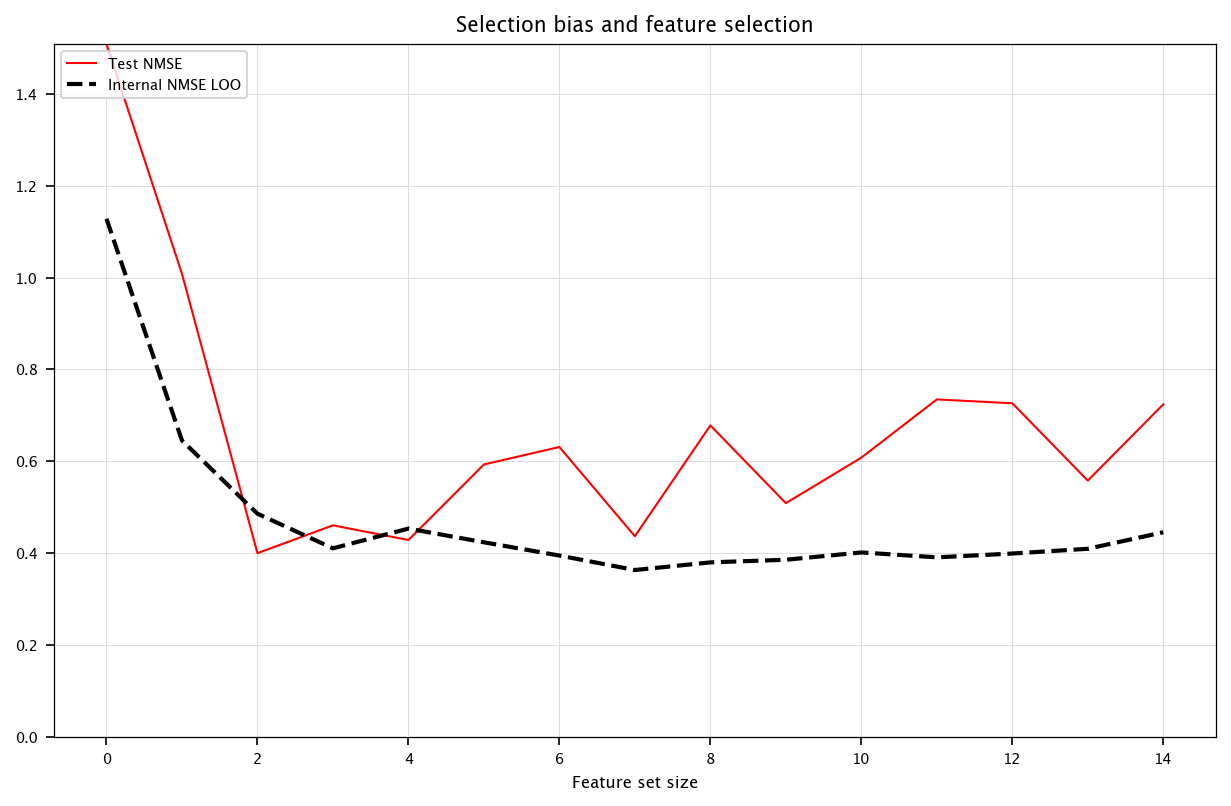

In [17]:
def pred(X_train, Y_train, X_test):
   reg = sklearn.tree.DecisionTreeRegressor().fit(X_train, Y_train)
   return reg.predict(X_test)

X_tr = X.to_numpy()[:200]
Y_tr = Y[:200]
X_ts = X.to_numpy()[200:250]
Y_ts = Y[200:250]

N_tr = X_tr.shape[0]

fset = []
bestr = []
bests = []

for it in tqdm(range(15)):
    NMSEf = {}
    candidates = [f for f in range(n) if f not in fset]
    for f in candidates:
        e = np.empty(N_tr)
        for i in range(N_tr):
            X_train_all = np.delete(X_tr, i, axis=0)
            Y_train_all = np.delete(Y_tr, i) 
            cols = [j - 1 for j in (fset + [f])]
            X_train = X_train_all[:, cols]
            X_test_sample = X_tr[i, cols]
            Yhati = pred(X_train, Y_train_all, X_test_sample.reshape(1, -1))
            e[i] = (Y[i] - Yhati)**2/np.std(Y_tr)**2
        NMSEf[f] = np.mean(e)
    f_best = min(NMSEf, key=NMSEf.get)
    fset.append(f_best)
    bestr.append(NMSEf[f_best])
    cols = [j - 1 for j in fset]
    Y_hats = pred(X_tr[:, cols], Y_tr, X_ts[:, cols])
    nmse_test = nmse(Y_hats, Y_ts)
    bests.append(nmse_test) 
    
pprint(fset)
pprint(np.array(bests) - np.array(bestr))

plt.figure(figsize=(10, 6))
plt.plot(bests, color="red", label="Test NMSE")
plt.plot(bestr, linestyle="--", linewidth=2, color="black", label="Internal NMSE LOO")
plt.ylim(0, max(bests))
plt.title("Selection bias and feature selection")
plt.xlabel("Feature set size")
plt.ylabel("")
plt.legend(loc="upper left")
plt.grid("on")
plt.show()

In [18]:
R = 20
CV_err_lm_ensemble_model = []

for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    Y_hat_ts_ensemble = np.zeros((X_ts.shape[0], R))
    for r in range(R):
        idx_tr_resample = np.random.choice(train_index, size=len(train_index), replace=True)
        X_tr_res = X.iloc[idx_tr_resample]
        Y_tr_res = Y[idx_tr_resample]
        
        model = LinearRegression()
        model.fit(X_tr_res, Y_tr_res)
        Y_hat_ts_ensemble[:, r] = model.predict(X_ts)
    
    Y_hat_ts = np.mean(Y_hat_ts_ensemble, axis=1)
    CV_err_lm_ensemble_model.append(nmse(Y_ts, Y_hat_ts))

print(f"CV error: {np.mean(CV_err_lm_ensemble_model):.5f}, std dev: {np.std(CV_err_lm_ensemble_model):.5f}")
print("Is ensemble error lower than single model?", np.mean(CV_err_lm_ensemble_model) < np.mean(CV_err_lm_single_model))

CV error: 0.60855, std dev: 0.08307
Is ensemble error lower than single model? True


In [19]:
R = 20
CV_err_rpart_ensemble_model = []

for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    Y_hat_ts_ensemble = np.zeros((X_ts.shape[0], R))
    for r in range(R):
        idx_tr_resample = np.random.choice(train_index, size=len(train_index), replace=True)
        X_tr_res = X.iloc[idx_tr_resample]
        Y_tr_res = Y[idx_tr_resample]
        
        model = DecisionTreeRegressor(random_state=r)
        model.fit(X_tr_res, Y_tr_res)
        Y_hat_ts_ensemble[:, r] = model.predict(X_ts)
    
    Y_hat_ts = np.mean(Y_hat_ts_ensemble, axis=1)
    CV_err_rpart_ensemble_model.append(nmse(Y_ts, Y_hat_ts))

print(f"CV error: {np.mean(CV_err_rpart_ensemble_model):.5f}, std dev: {np.std(CV_err_rpart_ensemble_model):.5f}")
print("Is ensemble error lower than single model?", np.mean(CV_err_rpart_ensemble_model) < np.mean(CV_err_rpart_single_model))

CV error: 0.15982, std dev: 0.04733
Is ensemble error lower than single model? True


In [20]:
correlations = np.abs(X.corrwith(pd.Series(Y)))
ranking_corr_idx = correlations.sort_values(ascending=False).index

CV_err = np.zeros((n,10))

fold_id = 0
for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    for nb_features in range(1, n+1):
        selected_features = ranking_corr_idx[:nb_features]
        model = LinearRegression()
        model.fit(X_tr[selected_features], Y_tr)
        Y_hat_ts = model.predict(X_ts[selected_features])
        CV_err[nb_features-1, fold_id] = nmse(Y_ts, Y_hat_ts)
    fold_id += 1

for i in range(n):
    print("#Features:", i+1, "; CV error=", round(np.mean(CV_err[i,:]),4),
          "; std dev=", round(np.std(CV_err[i,:]),4))

print("Correlation ranking:")
print(ranking_corr_idx.tolist())

#Features: 1 ; CV error= 0.8381 ; std dev= 0.0698
#Features: 2 ; CV error= 0.7428 ; std dev= 0.0702
#Features: 3 ; CV error= 0.653 ; std dev= 0.093
#Features: 4 ; CV error= 0.607 ; std dev= 0.0841
#Features: 5 ; CV error= 0.5946 ; std dev= 0.0848
#Features: 6 ; CV error= 0.5957 ; std dev= 0.0857
#Features: 7 ; CV error= 0.5952 ; std dev= 0.0871
#Features: 8 ; CV error= 0.5958 ; std dev= 0.0894
#Features: 9 ; CV error= 0.5943 ; std dev= 0.0903
#Features: 10 ; CV error= 0.5936 ; std dev= 0.0867
#Features: 11 ; CV error= 0.5944 ; std dev= 0.0867
#Features: 12 ; CV error= 0.595 ; std dev= 0.0869
#Features: 13 ; CV error= 0.5958 ; std dev= 0.0865
#Features: 14 ; CV error= 0.5966 ; std dev= 0.0857
#Features: 15 ; CV error= 0.5976 ; std dev= 0.0874
#Features: 16 ; CV error= 0.5984 ; std dev= 0.0876
#Features: 17 ; CV error= 0.5999 ; std dev= 0.0865
#Features: 18 ; CV error= 0.6009 ; std dev= 0.0865
#Features: 19 ; CV error= 0.601 ; std dev= 0.0864
#Features: 20 ; CV error= 0.6017 ; std dev= 0

In [21]:
def mutual_info_corr(X, Y):
    c = np.corrcoef(X, Y)[0,1]
    # Avoid invalid value if correlation == 1 or == -1
    if abs(c)==1:
        c = 0.999999
    return -0.5 * np.log(1 - c**2)

def compute_mi_vector(X_tr, Y_tr):
    mis = []
    for col in X_tr.columns:
        mi = mutual_info_corr(X_tr[col].values, Y_tr)
        mis.append(mi)
    return np.array(mis)

CV_err = np.zeros((n,10))

fold_id = 0
for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    mutual_info_values = compute_mi_vector(X_tr, Y_tr)
    selected = []
    candidates = list(range(n))
    
    for j in range(n):
        redundancy_score = np.zeros(len(candidates))
        if len(selected)>0:
            # Compute pairwise mi between selected and candidates
            mi_sc = []
            for cidx in candidates:
                col_c = X_tr.iloc[:, cidx]
                mis_c = []
                for sidx in selected:
                    col_s = X_tr.iloc[:, sidx]
                    # Compute mutual info between col_s and col_c
                    cc = np.corrcoef(col_s, col_c)[0,1]
                    if abs(cc)==1:
                        cc=0.999999
                    mis_c.append(-0.5*np.log(1-cc**2))
                redundancy_score[candidates.index(cidx)] = np.mean(mis_c)
        mRMR_score = mutual_info_values[candidates] - redundancy_score
        best_idx = candidates[np.argmax(mRMR_score)]
        selected.append(best_idx)
        candidates.remove(best_idx)
    
    # selected is the ranking
    for nb_features in range(1, n+1):
        features_to_use = [X.columns[i] for i in selected[:nb_features]]
        model = LinearRegression()
        model.fit(X_tr[features_to_use], Y_tr)
        Y_hat_ts = model.predict(X_ts[features_to_use])
        CV_err[nb_features-1, fold_id] = nmse(Y_ts, Y_hat_ts)
    fold_id += 1

for i in range(n):
    print("#Features:", i+1, "; CV error=", round(np.mean(CV_err[i,:]),4),
          "; std dev=", round(np.std(CV_err[i,:]),4))
    
print("Selected features ranking (mRMR):")
print([X.columns[i] for i in selected])

#Features: 1 ; CV error= 0.8381 ; std dev= 0.0698
#Features: 2 ; CV error= 0.78 ; std dev= 0.0908
#Features: 3 ; CV error= 0.653 ; std dev= 0.093
#Features: 4 ; CV error= 0.607 ; std dev= 0.0841
#Features: 5 ; CV error= 0.6163 ; std dev= 0.0875
#Features: 6 ; CV error= 0.6183 ; std dev= 0.088
#Features: 7 ; CV error= 0.6212 ; std dev= 0.0908
#Features: 8 ; CV error= 0.6115 ; std dev= 0.0918
#Features: 9 ; CV error= 0.6002 ; std dev= 0.0879
#Features: 10 ; CV error= 0.5992 ; std dev= 0.0884
#Features: 11 ; CV error= 0.5985 ; std dev= 0.086
#Features: 12 ; CV error= 0.602 ; std dev= 0.0877
#Features: 13 ; CV error= 0.6031 ; std dev= 0.0885
#Features: 14 ; CV error= 0.604 ; std dev= 0.0867
#Features: 15 ; CV error= 0.605 ; std dev= 0.0855
#Features: 16 ; CV error= 0.6059 ; std dev= 0.0846
#Features: 17 ; CV error= 0.6053 ; std dev= 0.0839
#Features: 18 ; CV error= 0.6059 ; std dev= 0.0834
#Features: 19 ; CV error= 0.6068 ; std dev= 0.0832
#Features: 20 ; CV error= 0.6084 ; std dev= 0.0839

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

CV_err = np.zeros((n,10))
fold_id = 0
for train_index, test_index in kf.split(X_pca):
    X_tr, X_ts = X_pca[train_index], X_pca[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    for nb_components in range(1, n+1):
        model = LinearRegression()
        model.fit(X_tr[:, :nb_components], Y_tr)
        Y_hat_ts = model.predict(X_ts[:, :nb_components])
        CV_err[nb_components-1, fold_id] = nmse(Y_ts, Y_hat_ts)
    fold_id += 1

for i in range(n):
    print("#Features:", i+1, "; CV error=", round(np.mean(CV_err[i,:]),4),
          "; std dev=", round(np.std(CV_err[i,:]),4))

#Features: 1 ; CV error= 1.0133 ; std dev= 0.02
#Features: 2 ; CV error= 1.0153 ; std dev= 0.0189
#Features: 3 ; CV error= 0.9341 ; std dev= 0.0545
#Features: 4 ; CV error= 0.9221 ; std dev= 0.069
#Features: 5 ; CV error= 0.9244 ; std dev= 0.0759
#Features: 6 ; CV error= 0.9187 ; std dev= 0.069
#Features: 7 ; CV error= 0.9215 ; std dev= 0.0679
#Features: 8 ; CV error= 0.9083 ; std dev= 0.0599
#Features: 9 ; CV error= 0.8926 ; std dev= 0.0604
#Features: 10 ; CV error= 0.8934 ; std dev= 0.0612
#Features: 11 ; CV error= 0.8927 ; std dev= 0.0655
#Features: 12 ; CV error= 0.8842 ; std dev= 0.0702
#Features: 13 ; CV error= 0.8779 ; std dev= 0.0636
#Features: 14 ; CV error= 0.8748 ; std dev= 0.0702
#Features: 15 ; CV error= 0.8426 ; std dev= 0.0768
#Features: 16 ; CV error= 0.8429 ; std dev= 0.0761
#Features: 17 ; CV error= 0.8416 ; std dev= 0.0758
#Features: 18 ; CV error= 0.7877 ; std dev= 0.091
#Features: 19 ; CV error= 0.7767 ; std dev= 0.079
#Features: 20 ; CV error= 0.7777 ; std dev= 0.

In [23]:
selected = []
for round_i in range(n):
    candidates = list(set(range(n)) - set(selected))
    CV_err_temp = []
    for c in candidates:
        features_to_include = selected + [c]
        fold_errors = []
        for train_index, test_index in kf.split(X):
            X_tr, X_ts = X.iloc[train_index, features_to_include], X.iloc[test_index, features_to_include]
            Y_tr, Y_ts = Y[train_index], Y[test_index]
            
            model = LinearRegression()
            model.fit(X_tr, Y_tr)
            Y_hat_ts = model.predict(X_ts)
            fold_errors.append(nmse(Y_ts, Y_hat_ts))
        CV_err_temp.append(np.mean(fold_errors))
    
    best_candidate = candidates[np.argmin(CV_err_temp)]
    selected.append(best_candidate)
    print("Round", round_i+1, "; Selected feature:", best_candidate,
          "; CV error=", round(min(CV_err_temp),4), 
          "; std dev=", round(np.std(fold_errors),4))

print("Selected features:", [X.columns[i] for i in selected])

Round 1 ; Selected feature: 3 ; CV error= 0.8381 ; std dev= 0.0148


Round 2 ; Selected feature: 4 ; CV error= 0.7428 ; std dev= 0.0716


Round 3 ; Selected feature: 1 ; CV error= 0.653 ; std dev= 0.0707


Round 4 ; Selected feature: 0 ; CV error= 0.607 ; std dev= 0.0929


Round 5 ; Selected feature: 2 ; CV error= 0.5946 ; std dev= 0.0838


Round 6 ; Selected feature: 6 ; CV error= 0.593 ; std dev= 0.0844


Round 7 ; Selected feature: 5 ; CV error= 0.5925 ; std dev= 0.0868


Round 8 ; Selected feature: 14 ; CV error= 0.592 ; std dev= 0.0877


Round 9 ; Selected feature: 23 ; CV error= 0.5916 ; std dev= 0.0882


Round 10 ; Selected feature: 24 ; CV error= 0.5918 ; std dev= 0.0847


Round 11 ; Selected feature: 10 ; CV error= 0.5922 ; std dev= 0.0847


Round 12 ; Selected feature: 17 ; CV error= 0.5927 ; std dev= 0.086


Round 13 ; Selected feature: 22 ; CV error= 0.5933 ; std dev= 0.085


Round 14 ; Selected feature: 18 ; CV error= 0.594 ; std dev= 0.0844


Round 15 ; Selected feature: 9 ; CV error= 0.5946 ; std dev= 0.0845


Round 16 ; Selected feature: 12 ; CV error= 0.5953 ; std dev= 0.0846


Round 17 ; Selected feature: 11 ; CV error= 0.596 ; std dev= 0.0849


Round 18 ; Selected feature: 16 ; CV error= 0.5968 ; std dev= 0.0849
Round 19 ; Selected feature: 8 ; CV error= 0.5976 ; std dev= 0.0851


Round 20 ; Selected feature: 26 ; CV error= 0.5984 ; std dev= 0.0852


Round 21 ; Selected feature: 20 ; CV error= 0.5992 ; std dev= 0.0856
Round 22 ; Selected feature: 7 ; CV error= 0.6002 ; std dev= 0.0852


Round 23 ; Selected feature: 29 ; CV error= 0.6012 ; std dev= 0.0868
Round 24 ; Selected feature: 15 ; CV error= 0.6023 ; std dev= 0.0866


Round 25 ; Selected feature: 27 ; CV error= 0.6034 ; std dev= 0.0855
Round 26 ; Selected feature: 25 ; CV error= 0.6047 ; std dev= 0.0867
Round 27 ; Selected feature: 28 ; CV error= 0.606 ; std dev= 0.0847


Round 28 ; Selected feature: 19 ; CV error= 0.6072 ; std dev= 0.0841
Round 29 ; Selected feature: 21 ; CV error= 0.6088 ; std dev= 0.0857
Round 30 ; Selected feature: 13 ; CV error= 0.6106 ; std dev= 0.084
Selected features: ['x_useful_4', 'x_useful_5', 'x_useful_2', 'x_useful_1', 'x_useful_3', 'x_useless_1', 'x_useful_6', 'x_useless_9', 'x_useless_18', 'x_useless_19', 'x_useless_5', 'x_useless_12', 'x_useless_17', 'x_useless_13', 'x_useless_4', 'x_useless_7', 'x_useless_6', 'x_useless_11', 'x_useless_3', 'x_useless_21', 'x_useless_15', 'x_useless_2', 'x_useless_24', 'x_useless_10', 'x_useless_22', 'x_useless_20', 'x_useless_23', 'x_useless_14', 'x_useless_16', 'x_useless_8']


In [24]:
from sklearn.svm import SVR

CV_err_svm_single_model = []
for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    model = SVR()
    model.fit(X_tr, Y_tr)
    Y_hat_ts = model.predict(X_ts)
    CV_err_svm_single_model.append(nmse(Y_ts, Y_hat_ts))

print(f"CV error: {np.mean(CV_err_svm_single_model):.5f}, std dev: {np.std(CV_err_svm_single_model):.5f}")

CV error: 0.30621, std dev: 0.03799


In [25]:
# Feature selection with mRMR for SVM

n_variables = 10

CV_err_svm_single_model_fs = np.zeros((n_variables,10))
fold_id = 0

for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    mutual_info_values = compute_mi_vector(X_tr, Y_tr)
    selected = []
    candidates = list(range(n))
    
    for j in range(n_variables):
        redundancy_score = np.zeros(len(candidates))
        if len(selected)>0:
            for ci, cidx in enumerate(candidates):
                col_c = X_tr.iloc[:, cidx].values
                mis_c = []
                for sidx in selected:
                    col_s = X_tr.iloc[:, sidx].values
                    cc = np.corrcoef(col_s, col_c)[0,1]
                    if abs(cc)==1:
                        cc=0.999999
                    mis_c.append(-0.5*np.log(1-cc**2))
                redundancy_score[ci] = np.mean(mis_c)
        mRMR_score = mutual_info_values[candidates] - redundancy_score
        best_idx = candidates[np.argmax(mRMR_score)]
        selected.append(best_idx)
        candidates.remove(best_idx)
        
    # Evaluate performance with subsets of selected features
    for nb_features in range(1, n_variables+1):
        feats = [X.columns[i] for i in selected[:nb_features]]
        model = SVR()
        model.fit(X_tr[feats], Y_tr)
        Y_hat_ts = model.predict(X_ts[feats])
        CV_err_svm_single_model_fs[nb_features-1, fold_id] = nmse(Y_ts, Y_hat_ts)
    fold_id+=1

for i in range(n_variables):
    print("#Features:", i+1, "; CV error=",round(np.mean(CV_err_svm_single_model_fs[i,:]),4),
          "; std dev=", round(np.std(CV_err_svm_single_model_fs[i,:]),4))

#Features: 1 ; CV error= 0.8414 ; std dev= 0.075
#Features: 2 ; CV error= 0.5971 ; std dev= 0.0822
#Features: 3 ; CV error= 0.183 ; std dev= 0.026
#Features: 4 ; CV error= 0.1254 ; std dev= 0.024
#Features: 5 ; CV error= 0.1144 ; std dev= 0.0451
#Features: 6 ; CV error= 0.1195 ; std dev= 0.0469
#Features: 7 ; CV error= 0.1078 ; std dev= 0.0507
#Features: 8 ; CV error= 0.0957 ; std dev= 0.0504
#Features: 9 ; CV error= 0.083 ; std dev= 0.0235
#Features: 10 ; CV error= 0.102 ; std dev= 0.0231


In [26]:
from sklearn.neural_network import MLPRegressor

CV_err_nnet_single_model = []

for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]

    # Rescale input to 0-1
    min_X, max_X = np.min(X_tr), np.max(X_tr)
    X_tr = (X_tr-min_X)/(max_X-min_X)
    X_ts = (X_ts-min_X)/(max_X-min_X)
    
    # Rescale output to 0-1
    min_Y, max_Y = np.min(Y_tr), np.max(Y_tr)
    Y_tr_rescale = (Y_tr-min_Y)/(max_Y-min_Y)
    
    model = MLPRegressor(hidden_layer_sizes=(20,), max_iter=10000, learning_rate_init=0.05, random_state=3)
    model.fit(X_tr, Y_tr_rescale)
    Y_hat_ts = (model.predict(X_ts)*(max_Y-min_Y))+min_Y
    CV_err_nnet_single_model.append(nmse(Y_ts, Y_hat_ts))

print(f"CV error: {np.mean(CV_err_nnet_single_model):.5f}, std dev: {np.std(CV_err_nnet_single_model):.5f}")

CV error: 0.74304, std dev: 0.11244


In [27]:
CV_err_nnet_single_model_fs = np.zeros((n_variables,10))
fold_id=0
for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
     # Rescale input to 0-1
    min_X, max_X = np.min(X_tr), np.max(X_tr)
    X_tr = (X_tr-min_X)/(max_X-min_X)
    X_ts = (X_ts-min_X)/(max_X-min_X)
    
    # Rescale output to 0-1
    min_Y, max_Y = np.min(Y_tr), np.max(Y_tr)
    Y_tr_rescale = (Y_tr-min_Y)/(max_Y-min_Y)
    
    mutual_info_values = compute_mi_vector(X_tr, Y_tr)
    selected = []
    candidates = list(range(n))
    
    for j in range(n_variables):
        redundancy_score = np.zeros(len(candidates))
        if len(selected)>0:
            for ci, cidx in enumerate(candidates):
                col_c = X_tr.iloc[:, cidx].values
                mis_c = []
                for sidx in selected:
                    col_s = X_tr.iloc[:, sidx].values
                    cc = np.corrcoef(col_s, col_c)[0,1]
                    if abs(cc)==1:
                        cc=0.999999
                    mis_c.append(-0.5*np.log(1-cc**2))
                redundancy_score[ci] = np.mean(mis_c)
        mRMR_score = mutual_info_values[candidates] - redundancy_score
        best_idx = candidates[np.argmax(mRMR_score)]
        selected.append(best_idx)
        candidates.remove(best_idx)
        
    for nb_features in range(1, n_variables+1):
        feats = [X.columns[i] for i in selected[:nb_features]]
        Y_tr_rescale = Y_tr/10.0
        model = MLPRegressor(hidden_layer_sizes=(20,), max_iter=1000000, learning_rate_init=0.005, random_state=3)
        model.fit(X_tr[feats], Y_tr_rescale)
        Y_hat_ts = model.predict(X_ts[feats])*10.0
        CV_err_nnet_single_model_fs[nb_features-1, fold_id] = nmse(Y_ts, Y_hat_ts)
    fold_id+=1

for i in range(n_variables):
    print("#Features:", i+1, "; CV error=",round(np.mean(CV_err_nnet_single_model_fs[i,:]),4),
          "; std dev=", round(np.std(CV_err_nnet_single_model_fs[i,:]),4))

#Features: 1 ; CV error= 0.9628 ; std dev= 0.0169
#Features: 2 ; CV error= 0.7953 ; std dev= 0.0796
#Features: 3 ; CV error= 1.0145 ; std dev= 0.019
#Features: 4 ; CV error= 0.6137 ; std dev= 0.1695
#Features: 5 ; CV error= 0.7216 ; std dev= 0.1528
#Features: 6 ; CV error= 0.9217 ; std dev= 0.0781
#Features: 7 ; CV error= 1.0388 ; std dev= 0.0871
#Features: 8 ; CV error= 0.6766 ; std dev= 0.1451
#Features: 9 ; CV error= 0.771 ; std dev= 0.2262
#Features: 10 ; CV error= 0.8937 ; std dev= 0.1428


In [28]:
from sklearn.neighbors import KNeighborsRegressor

CV_err_lazy_single_model = []
for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_tr, Y_tr)
    Y_hat_ts = model.predict(X_ts)
    CV_err_lazy_single_model.append(nmse(Y_ts, Y_hat_ts))

print(f"CV error: {np.mean(CV_err_lazy_single_model):.5f}, std dev: {np.std(CV_err_lazy_single_model):.5f}")

CV error: 0.64745, std dev: 0.08826


In [29]:
# Feature selection for KNN using mRMR
CV_err_lazy_single_model_fs = np.zeros((n_variables,10))
fold_id=0
for train_index, test_index in kf.split(X):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_ts = Y[train_index], Y[test_index]
    
    mutual_info_values = compute_mi_vector(X_tr, Y_tr)
    selected = []
    candidates = list(range(n))
    
    for j in range(n_variables):
        redundancy_score = np.zeros(len(candidates))
        if len(selected)>0:
            for ci, cidx in enumerate(candidates):
                col_c = X_tr.iloc[:, cidx].values
                mis_c = []
                for sidx in selected:
                    col_s = X_tr.iloc[:, sidx].values
                    cc = np.corrcoef(col_s, col_c)[0,1]
                    if abs(cc)==1:
                        cc=0.999999
                    mis_c.append(-0.5*np.log(1-cc**2))
                redundancy_score[ci] = np.mean(mis_c)
        mRMR_score = mutual_info_values[candidates] - redundancy_score
        best_idx = candidates[np.argmax(mRMR_score)]
        selected.append(best_idx)
        candidates.remove(best_idx)
        
    for nb_features in range(1, n_variables+1):
        feats = [X.columns[i] for i in selected[:nb_features]]
        model = KNeighborsRegressor(n_neighbors=5)
        model.fit(X_tr[feats], Y_tr)
        Y_hat_ts = model.predict(X_ts[feats])
        CV_err_lazy_single_model_fs[nb_features-1, fold_id] = nmse(Y_ts, Y_hat_ts)
    fold_id+=1

for i in range(n_variables):
    print("#Features:", i+1, "; CV error=",round(np.mean(CV_err_lazy_single_model_fs[i,:]),4),
          "; std dev=", round(np.std(CV_err_lazy_single_model_fs[i,:]),4))

#Features: 1 ; CV error= 1.0255 ; std dev= 0.1243
#Features: 2 ; CV error= 0.6467 ; std dev= 0.0697
#Features: 3 ; CV error= 0.1922 ; std dev= 0.0355
#Features: 4 ; CV error= 0.1776 ; std dev= 0.0256
#Features: 5 ; CV error= 0.2117 ; std dev= 0.0552
#Features: 6 ; CV error= 0.2288 ; std dev= 0.0604
#Features: 7 ; CV error= 0.2699 ; std dev= 0.0667
#Features: 8 ; CV error= 0.2859 ; std dev= 0.0732
#Features: 9 ; CV error= 0.2874 ; std dev= 0.0361
#Features: 10 ; CV error= 0.3455 ; std dev= 0.0363
